# <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 200px; display: inline" alt="Python"/></a> pour Statistique et Science des Données

Ce notebook est fortement inspiré du cours d'[introduction à Python](https://github.com/wikistat/Intro-Python) réalisé par **Philippe Besse** pour l'INSA Toulouse et utilisé avec respect de la licence. Quelques modifications ont été apportées afin de mieux cibler les besoins du cours de Data Mining.

# Traitement de données avec  <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 150px; display: inline" alt="Python"/></a> & <a href="http://pandas.pydata.org/"><img src="http://pandas.pydata.org/_static/pandas_logo.png" style="max-width: 250px; display: inline" alt="Pandas"/></a> 

**Résumé**:  Utilisation de Python pour la préparation (*data preprocessing*) de données pas trop massives: qui tiennent en mémoire une fois réorganisées. Cette étape est abordée par l'initiation aux fonctionnalités de la librairie `pandas` et à la classe `DataFrame`; lire et écrire des fichiers, gérer une table de données et les types des variables, échantillonner, discrétiser, regrouper des modalités, description élémentaires uni et bi-variées; concaténation et jointure de tables.

## 1 Introduction
### 1.1 Objectifs
Le *data preprocessing* est l'ensemble des opérations permettant de passer de données brutes à une table (**DataFrame**) correcte et adaptée aux objectifs à atteindre par des  méthodes statistiques d'analyse, exploration, modélisation ou apprentissage. 

En présence de données complexes, peu ou mal organisées, présentant des trous, trop massives pour tenir en mémoire...  la qualité de cette étape est fondamentale (*garbage in, garbage out*) pour la bonne réalisation d'une étude. Compte tenu de la diversité des situations envisageables, il serait vain de vouloir exposer tous les outils et techniques qui peuvent s'avérer nécessaires. Tâchons néanmoins de résumer les problèmes qui peuvent être rencontrés.

### 1.2 Croissance du volume

De façon générale, pandas est à utiliser pour traiter des **données pouvant tenir telles quelles en mémoire vive** une fois chargées. Attention : en raison des informations supplémentaires à charger (métadonnées), charger un fichier CSV de 500 Mo nécessitera légèrement plus que 500 Mo de RAM.

Si ces données sont trop larges (*out of core processing*), trois solutions :
* Acheter de la mémoire vive
* Réduire la quantité de données par transformation avec un système de calcul distribué approprié (Spark, Dask, requête SQL bien ficelée, etc...)
* Charger et traiter les données blocs par blocs avec pandas. Cette pratique est dite *chunking*.

La première solution est simple mais vite limitée. 

La deuxième est certainement la meilleure mais nécessite le déploiement (et la maintenance !) de services tiers qui sont en dehors du cadre de ce cours. 

Enfin, la dernière pratique est à éviter si possible car elle impose des restrictions sur les traitements (pas possible de définir des traitements dépendants d'une donnée dans un autre bloc notamment).

### 1.3 Quelques problèmes

Liste non exhaustive des problèmes pouvant être rencontrés et dont la résolution nécessite simultanément des compétences en Informatique, Statistique, Mathématiques et aussi "métier" du domaine de l'étude. 
-  Identifier les "individus" $\times$ "variables" (*instances* $\times$ *features* en langue informatique) de la table à mettre en forme à partir de bases de données variées; *i.e.* logs d'un site web, listes d'incidents, localisations...
- Donnés atypiques/aberrantes (*outliers*): correction, suppression, transformation des variables ou méthode statistique robuste?
- Variable qualitative avec beaucoup de modalités dont certaines très peu fréquentes: suppression, modalité `autres`, recodage aléatoire, regroupement "métier" ou méthode tolérante?
- Distributions a-normales (log-normale, Poisson, multimodales...) et problèmes d'hétéroscédasticité: transformation, discrétisation ou méthodes tolérantes?
- Données manquantes: suppressions (ligne ou colonne), imputation ou méthodes tolérantes ?
- Représentations (splines, Fourier, ondelettes) et recalage (*time warping*) de données fonctionnelles.
- Représentation de trajectoires, de chemins sur un graphe ? 
- Choix d'une distance (quadratique, absolue, géodésique...) entre les objets étudiés.
- ...

Bien entendu les "bons" choix dépendent directement de l'objectif poursuivi et des méthodes mises en oeuvre par la suite. D'où l'importance d'intégrer de façon précoce, dès la planification du recueil des données, les compétences statistiques nécessaires au sein d'une équipe. 

### 1.4 Fonctionnalités de `pandas`

La richesse des fonctionnalités de la librairie `pandas` est une des raisons, si ce n'est la principale, d'utiliser Python pour extraire, préparer, et éventuellement analyser, des données. En voici un bref aperçu. 

- *Objets*: les classes `Series` et `DataFrame` étendant les capacités des `array` numpy.
- *Lire, écrire* : création et exportation de tables de données à partir de fichiers textes (séparateurs, `.csv`, format fixe, compressés), binaires (HDF5 avec `Pytable`), HTML, XML, JSON, MongoDB, SQL... 
- *Gestion*  d'une table: sélection des lignes, colonnes, transformations, réorganisation par niveau d'une modalité, discrétisation de variables quantitatives, exclusion ou imputation élémentaire de données manquantes, permutation et échantillonnage aléatoire, variables indicatrices, chaînes de caractères...
- *Statistiques* élémentaires  uni- et bivariées, tri à plat (nombre de modalités, de valeurs nulles, de valeurs manquantes...), graphiques associés, statistiques par groupe, détection élémentaire de valeurs atypiques...
- *Manipulation* de tables : concaténations, fusions, jointures, tri, gestion des types et formats...
- *Manipulation de données temporelle* : rééchantillonnage, découpage en fréquence, parsing de date, extraction de composants d'un timestamp, etc...
- *Visualisation (simple)* : création rapide de graphes statiques simples, idéaux pour une exploration rapide

La maîtrise de `pandas` est un **passage incontournable pour analyser des données en Python** (et de plus en plus un passage incontournable pour analyser des données tout court). La librairie est surtout adaptée au **traitement de données tabulaires**. Pour des données d'autres types, d'autres librairies seront plus adaptées (e.g. `networkx` pour les données en graphes).

*A contrario*, la maîtrise de `numpy` est davantage utile pour accéder à des fonctions plus bas niveau ou pour du calcul scientifique.

`numpy` et `pandas` sont parfaitement compatibles. La plupart des fonctions de `numpy` peuvent fonctionner directement sur des objets définis par `pandas` sans la moindre modification.

### 1.5 Références

Ce tutoriel élémentaire s'inspire largement de la [documentation en ligne](http://pandas.pydata.org/pandas-docs/stable/) à consulter **sans modération**. Vous trouverez d'ailleurs un raccourci vers cette documentation directement dans l'interface des notebooks (en haut, dans le menu *Help*).

La documentation officielle inclut également des [tutoriels](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) à exécuter pour compléter et approfondir la première ébauche d'un sujet relativement technique et qui peut prendre des tournures très diverses en fonction de la qualité et des types de données traitées.

Les deux livres suivants sont également bien conçus et raisonnablement à jour
* **Chen Daniel** (2017). *Pandas for Everyone: Python Data Analysis*
* **Petrou Theodore** (2017). *Pandas Cookbook: Recipes for Scientific Computing, Time Series Analysis and Data Visualization using Python*

### 1.6 Données d'exemple

Les données choisies pour illustrer ce tutoriel sont issues d'une compétition du site [Kaggle](https://www.kaggle.com/): [Titanic: Machine learnic from Disaster](https://www.kaggle.com/c/titanic-gettingStarted). Le concours est terminé mais les [données](https://www.kaggle.com/c/titanic-gettingStarted/data) sont toujours disponibles sur le site avec des tutoriels utilisant Excel, Python ou R.

Ces données sont reproduites dans le fichier `titanic.csv` présent dans le répertoire courant.

Une des raisons du drame, qui provoqua la mort de 1502 personnes sur les 2224 passagers et membres d'équipage, fut le manque de canots de sauvetage. Il apparaît que les chances de survie dépendaient de différents facteurs (sexe, âge, classe...). Le but du concours est de construire un modèle de prévision (classification supervisée) de survie en fonction de ces facteurs. Les données sont composées d'un échantillon d'apprentissage (891) et d'un échantillon test (418) chacun décrit par 11 variables dont la première indiquant la survie ou non lors du naufrage.

On se cantonnera dans cette introduction à une simple exploration de ces données et non une modélisation.

#### Liste des variables

Label  | Intitulé
----------|-------------
survival   |     Survival (0 = No; 1 = Yes)
pclass   |       Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name    |       Name
sex     |        Sex
age     |        Age
sibsp   |        Number of Siblings/Spouses Aboard
parch    |       Number of Parents/Children Aboard
ticket   |       Ticket Number
fare    |        Passenger Fare
cabin   |        Cabin
embarked |       Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## 2 Les classes `Series` et `DataFrame`
De même que la librairie `numpy` introduit le type `array` indispensable à la manipulation de matrices en calcul scientifique, `pandas` introduit les classes `Series` (séries 1D) et `DataFrame` (tableaux 2D) ou table de données indispensables en statistique. 

### 2.1 *Series*
La classe `Series` est l'association de deux `arrays` unidimensionnels. Le premier est un ensemble de valeurs indexées par le 2ème qui est souvent une série temporelle.  Ce type est introduit principalement pour des applications en Econométrie et Finance où Python est largement utilisé.

### 2.2 *DataFrame*
Cette classe est proche de celle du même nom dans le langage R, il s'agit d'associer avec le même index de lignes des **colonnes de types différents** (entier, réel, booléen, caractère). C'est un **tableau bi-dimensionnel** avec des index de lignes et de colonnes mais il peut également être vu comme une liste de `Series` partageant le même index. C'est la classe qui sera principalement utilisée dans ce tutoriel. 

In [1]:
# Exemple de DataFrame
import pandas as pd

# On peut définir les données colonne par colonne
# Remarque : un dictionnaire ne garantit pas de conserver l'ordre d'insertion

data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9]}

# L'ordre des colonnes dépend de l'ordre dans le dictionnaire data, qui n'est pas certain
df = pd.DataFrame(data)

# Pour fixer l'ordre des colonnes
pd.DataFrame(data, columns=["year", "state", "pop"])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [2]:
# index des lignes et valeurs manquantes (NaN)
df2 = pd.DataFrame(data, 
                   columns=["year", "state", "pop", "debt"], 
                   index=["one", "two", "three", "four", "five"])

# Liste des colonnes
df2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [3]:
# Accéder à une colonne en particulier
df["state"]

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object

In [4]:
df2.state # Equivalent à la cellule précédente

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [5]:
type(df2.state) # Chaque colonne d'un DataFrame est une Series

pandas.core.series.Series

In [6]:
df2.state.unique() # Equivalent à un SELECT DISTINCT en SQL

array(['Ohio', 'Nevada'], dtype=object)

In [7]:
# Remplir une colonne avec une valeur unique
df2.debt = 16.5
df2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [8]:
# Ou alors avec une valeur par ligne
df2.debt = [5.2, 3.2, 1.0, 15.0, 65.0]
df2

,year,state,pop,debt
one,2000,Ohio,1.5,5.2
two,2001,Ohio,1.7,3.2
three,2002,Ohio,3.6,1.0
four,2001,Nevada,2.4,15.0
five,2002,Nevada,2.9,65.0


In [9]:
# Créer une colonne à la volée
df2['new_column'] = 'this is new !'
df2

,year,state,pop,debt,new_column
one,2000,Ohio,1.5,5.2,this is new !
two,2001,Ohio,1.7,3.2,this is new !
three,2002,Ohio,3.6,1.0,this is new !
four,2001,Nevada,2.4,15.0,this is new !
five,2002,Nevada,2.9,65.0,this is new !


In [10]:
# Comparer des colonnes ensemble (élément par élément)
df2['pop'] >= df2.debt

one      False
two      False
three     True
four     False
five     False
dtype: bool

In [11]:
# Supprimer une colonne
del df2["new_column"]
df2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [12]:
# Renommer les colonnes
df2.rename(columns={'pop': 'population'}) # seules les colonnes indiquées sont modifiées

,year,state,population,debt
one,2000,Ohio,1.5,5.2
two,2001,Ohio,1.7,3.2
three,2002,Ohio,3.6,1.0
four,2001,Nevada,2.4,15.0
five,2002,Nevada,2.9,65.0


### 2.3 Index
Les `Index` sont un cas particulier de `Series`. Une grande attention est en effet apporté à leur stockage afin d'optimiser les requêtes et les traitements dans les DataFrame.

Ainsi un Index régulier allant de 0 à 50 ne sera pas stocké dans une liste `[0, 1, 2, ..., 49]` mais dans un `RangeIndex`. De même, les Index contenant des dates ou des temps seront rangés de façon optimisé.

Ces détails d'implémentation ne sont pas très importants pour l'instant, mais justifie que l'on ne récupère pas directement une `Series` lorsque l'on sélectionne uniquement l'index.

In [13]:
df.index

RangeIndex(start=0, stop=5, step=1)

## 3 Lire écrire des tables de données
`pandas` offre des [outils efficaces](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) pour lire écrire des fichiers selon différents formats (csv, texte, fixe, compressé, xml, html, hdf5) ou interagir avec des bases de données SQL, MongoDB, des APIs web... Ce document se contente de décrire la fonction la plus courante en analyse : **`read_csv`**. 

En principe ces fonctions font appel à un code écrit en C dont très rapide à l'exécution sauf pour l'emploi de certaines options (`skip_footer`, `sep` autre qu'un seul caractère), à éviter si possible, qui provoquent une exécution en Python plus lente. 

A l'inverse, exporter un DataFrame `df` en mémoire vers un fichier CSV se fait simplement avec la commande `df.to_csv` qui utilise des options similaires. 

### 3.1 Syntaxe

L'exemple de base est donné pour lire un fichier au format `.csv` dont les valeurs sont séparées par des virgules (`,`) et dont la première ligne contient le nom des variables.

```python
import pandas as pd
data = pd.read_csv("fichier.csv") # Lecture, analyse des bons types, chargement en mémoire, en une seule ligne !
```

Il est important de connaître la liste des possibilités et options offertes par cette simple commande. Voici les principales ci-dessous et un lien à la [liste complète](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table).
- `path` chemin ou nom du fichier ou URL.
- `sep` délimiteur comme `+` `,` `;` `|` `\t` (tabulation) `\s+` (nombre variable d'espaces). Par défaut une virgule `,`
- `header` défaut 0, la première ligne contient le nom des variables; si `None` les noms sont générés ou définis par ailleurs.
- `index_col` noms ou numéros de colonnes définissant les index de lignes.
- `nrows` nombre maximal de lignes à lire. Par défaut lit tout le fichier.
- `skiprow` liste de lignes à sauter en lecture.
- `na_values` liste de valeurs à considérer comme des valeurs manquantes (e.g. `['n/a', 'na', 'null', 'absent']`)
- `usecols` noms des colonnes à conserver lors de la lecture. Par défaut sélectionne toutes les colonnes du fichier
- `chunksize` taille des morceaux à lire itérativement.
- `encoding` type d'encodage comme "utf-8" ou "latin-1". Par défaut "utf-8"
- `thousand` séparateur des miliers: "." ou ",". Par défaut pas de séparateur

Rassurez-vous, toutes ces options ont généralement une **valeur par défaut bien choisie** qui conviendra dans la plupart des cas. Néanmoins, si vous avez un fichier curieusement formaté, vous pourrez tout de même le lire et l'analyser rapidement grâce à la flexibilité permise par toutes ces options.

Remarques:
- De nombreuses options de gestion des dates et séries ne sont pas citées.
- `chunksize` provoque la lecture d'un gros fichiers par morceaux de même taille (nombre de lignes). On applique alors les mêmes traitements à chaque morceau puis on écrit les résultats dans un même fichier. Cette fonction permet donc de faire des traitements simples sur des fichiers trop gros pour être chargés en mémoire.


### 3.2 Exemple
On charge les données sur le naufrage du Titanic en mémoire.

Note : on suppose que ces données sont dans un fichier `titanic.csv` situées dans le même dossier que ce notebook.

In [14]:
import pandas as pd
import numpy as np


df = pd.read_csv('titanic.csv')

In [15]:
# Vérifions que les données aient bien été chargées

# La fonction suivante affiche les premières lignes et permet d'observer les erreurs flagrantes de lecture
df.head()
# On a également df.tail() pour afficher les dernières lignes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Les notebooks améliorent automatiquement l'affichage des DataFrame pour faciliter leur lecture !

Toutes les variables ci-dessous ne sont pas forcément utiles. On décide donc de relire le fichier en excluant les colonnes `Name`, `Ticket` et `Cabin`.

On utilisera également `PassengerID` comme index du DataFrame plutôt que de laisser pandas créer automatiquement un index incrémental.

In [16]:
df = pd.read_csv("titanic.csv", 
                 usecols=['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
                 index_col='PassengerId')

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


On peut déceler rapidement les erreurs de lecture en analysant le tableau des `dtypes` (*data types*). Ce tableau indique le type attribué à chaque colonne du DataFrame.

In [17]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Deux remarques importantes sur la gestion des types de données avec pandas
* le type `object` est le plus générique. Toutes les chaînes de caractères sont stockées par défaut dans ce type. Si vous observez une colonne censée être numérique avec un type `object`, il y a de fortes chances pour que certaines cellules de la colonne contiennent du texte.
* le type `int64` ne pouvait pas contenir de valeurs manquantes (`nan`) jusqu'à très récemment. Une colonne contenant uniquement des entiers et au moins une valeur nulle se verra donc affecter le type `float64`.

À partir de la version 0.15, `pandas`, inclut un type **`category`** assez proche de celui ` factor` de R et destiné aux **variables qualitatives**. Néanmoins pandas est bien entendu incapable de reconnaître seul si une colonne contient une mesure (types `object`, `int64`, etc...) ou un facteur (type `category`). Il faut donc **indiquer manuellement les colonnes contenant des modalités** (qu'elles soient numériques ou textuelles).

Deux possibilités pour déclarer ces facteurs :
* Lors de la lecture, en passant un dictionnaire de dtypes à `read_csv` : `dtype={'Surv': pd.Categorical}`
* Après la lecture, en castant la colonne dans le dtype `category` : `df.Sex = df.Sex.astype('category')`

Il est vivement recommandé de bien affecter les bons types à chaque variable ne serait-ce que pour éviter de faire des opérations douteuses, par exemple arithmétiques sur des codes de modalités.

In [18]:
# Commençons par renommer toutes les colonnes pour faciliter l'analyse
df.columns = ['survie', 'classe', 'genre', 'age', 'nb_freres_soeurs', 'nb_parents', 'prix', 'port']

# On convertit ensuite les colonnes vers les bons types
df = df.astype({'survie': 'bool',
               'classe': 'category',
               'genre': 'category',
               'port': 'category'})

df.head()

,survie,classe,genre,age,nb_freres_soeurs,nb_parents,prix,port
PassengerId,,,,,,,,
1,False,3,male,22.0,1,0,7.2500,S
2,True,1,female,38.0,1,0,71.2833,C
3,True,3,female,26.0,0,0,7.9250,S
4,True,1,female,35.0,1,0,53.1000,S
5,False,3,male,35.0,0,0,8.0500,S


In [19]:
# Vérifions que tous les dtypes soient corrects désormais
df.dtypes

survie                  bool
classe              category
genre               category
age                  float64
nb_freres_soeurs       int64
nb_parents             int64
prix                 float64
port                category
dtype: object

## 3 Gérer une table de données

### 3.1 Indexer simplement un DataFrame

Les méthodes `loc` et `iloc` permettent de sélectionner précisément des données contenues dans un DataFrame

* `loc` est dite *label-based* : vous pouvez utiliser des noms de colonnes ou des valeurs de l'index pour repérer les valeurs à sélectionner
* `iloc` est dite *position-based* : vous sélectionnez des variables en fonction de leur position dans le DataFrame

`loc` est donc à utiliser pour un besoin du type "je veux sélectionner toutes les lignes à l'index "Occitanie"", `iloc` vous permet de répondre à un besoin comme "je veux sélectionner la 5e ligne en partant du début du DataFrame".

In [20]:
# On crée un petit DataFrame de test

pop_region = pd.DataFrame(data={'population': [45, 96, 32, 21, 1],
                                'age_moyen' : [30, 35, 64, 40, 15]}, 
                          index=['Occitanie', 'IDF', 'PACA', 'Corse', 'Hauts de France'])
pop_region

,population,age_moyen
Occitanie,45,30
IDF,96,35
PACA,32,64
Corse,21,40
Hauts de France,1,15


In [21]:
# Sélectionner la population en Corse et PACA avec loc
# Autrement dit, on veut la colonne population pour les lignes PACA et Corse
pop_region.loc[['PACA', 'Corse'], 'population']

PACA     32
Corse    21
Name: population, dtype: int64

In [22]:
# Sélectionner la dernière colonne pour les deux dernières lignes avec iloc
pop_region.iloc[-2:, -1]

Corse              40
Hauts de France    15
Name: age_moyen, dtype: int64

**Bien maîtriser `loc` et `iloc` est crucial** pour pouvoir manipuler avec facilité des données dans pandas. N'hésitez pas à expérimenter avec un des DataFrame précédents pour vous entraîner.

### 3.2 Indexation avancée avec les filtres booléens

Vous voudrez souvent sélectionner des données en fonction d'un filtre : récupérer toutes les données supérieures à la moyenne, tous les textes commençants par la lettre "s", etc...
Les **filtres booléens** vous permettent de réaliser cette opération simplement

Un filtre booléen est automatiquement créé lorsqu'une opération booléenne (opérateurs `<` et `>`, fonction de comparaison, etc...) est appliquée sur un DataFrame. 

In [23]:
# Pour chaque ligne, True si l'âge moyen est >= à la médiane de la colonne (médiane des âges moyens)
pop_region.age_moyen >= pop_region.age_moyen.median()

Occitanie          False
IDF                 True
PACA                True
Corse               True
Hauts de France    False
Name: age_moyen, dtype: bool

En utilisant ce filtre comme indexeur, on récupère ainsi uniquement les lignes remplissant le filtre (avec une valeur à `True`).

In [24]:
pop_region[pop_region.age_moyen >= pop_region.age_moyen.median()]

,population,age_moyen
IDF,96,35
PACA,32,64
Corse,21,40


On peut accumuler les filtres avec les opérateurs `|` (or) et `&` (and)

In [25]:
df[(df.survie) & (df.age < 20)] # Tous les individus de -20 ans ayant survécu au naufrage

,survie,classe,genre,age,nb_freres_soeurs,nb_parents,prix,port
PassengerId,,,,,,,,
10,True,2,female,14.0,1,0,30.0708,C
11,True,3,female,4.0,1,1,16.7000,S
23,True,3,female,15.0,0,0,8.0292,Q
40,True,3,female,14.0,1,0,11.2417,C
44,True,2,female,3.0,1,2,41.5792,C
...,...,...,...,...,...,...,...,...
854,True,1,female,16.0,0,1,39.4000,S
856,True,3,female,18.0,0,1,9.3500,S
870,True,3,male,4.0,1,1,11.1333,S


Les `Series` (i.e. chaque colonne du DataFrame) peuvent également utiliser des [accesseurs](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#accessors) donnant accès rapidement à des fonctions automatiquement appliquées à chaque élément de la `Series`. Les accesseurs principaux sont :
* `.str.` : méthodes sur les chaînes de caractères
* `.dt.` : méthodes sur les datetimes
* `.cat.` : méthodes sur les modalités d'un facteur


Ces accesseurs peuvent entre autres permettre de concevoir des filtres complexes en quelques lignes.

La preuve par l'exemple :

In [26]:
# On relit tous le fichier titanic.csv
full_df = pd.read_csv('titanic.csv')

# Sélectionner tous les passagers avec le statut "Mrs" (Mademoiselle) et dont la cabine est dans le bloc C
full_df[full_df.Name.str.contains('Mrs') & full_df.Cabin.str.startswith('C')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C


In [27]:
full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.3 Discrétisation d'une variable quantitative

Pour discrétiser une variable quantitative, pandas fournit deux méthodes :
* `cut` qui crée des intervalles d'amplitudes égales (equal-width)
* `qcut` qui crée des intervalles d'effectifs égaux (equal-size)

`qcut` vous permet donc également de trier et de répartir vos données en quantiles.

Dans les deux cas, il vous incombe de choisir le nombre de classes à générer.

Les paramètres principaux de `qcut` sont les suivants :
* `x` : la `Series` à discrétiser
* `q` : le nombre de quantiles à calculer : 4 pour des quartiles, 10 pour des déciles, etc...
* `labels` : le nom à donner à chaque modalité pour les quantiles

Appliquons cette fonction pour discrétiser la variable `age` en quartiles.

In [28]:
df['age_q'] = pd.qcut(df.age, 4 , labels=['age_q1', 'age_q2', 'age_q3', 'age_q4'])

df

,survie,classe,genre,age,nb_freres_soeurs,nb_parents,prix,port,age_q
PassengerId,,,,,,,,,
1,False,3,male,22.0,1,0,7.2500,S,age_q2
2,True,1,female,38.0,1,0,71.2833,C,age_q3
3,True,3,female,26.0,0,0,7.9250,S,age_q2
4,True,1,female,35.0,1,0,53.1000,S,age_q3
5,False,3,male,35.0,0,0,8.0500,S,age_q3
...,...,...,...,...,...,...,...,...,...
887,False,2,male,27.0,0,0,13.0000,S,age_q2
888,True,1,female,19.0,0,0,30.0000,S,age_q1
889,False,3,female,NaN,1,2,23.4500,S,NaN


### 3.4 Modifier des modalités

Cette opération permet de renommer le nom des différentes modalités pour une variable qualitative.

Renommons ici le port d'embarquement pour être plus explicite.

In [29]:
df.port = df.port.cat.rename_categories({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df.head()

,survie,classe,genre,age,nb_freres_soeurs,nb_parents,prix,port,age_q
PassengerId,,,,,,,,,
1,False,3,male,22.0,1,0,7.2500,Southampton,age_q2
2,True,1,female,38.0,1,0,71.2833,Cherbourg,age_q3
3,True,3,female,26.0,0,0,7.9250,Southampton,age_q2
4,True,1,female,35.0,1,0,53.1000,Southampton,age_q3
5,False,3,male,35.0,0,0,8.0500,Southampton,age_q3


### 3.5 Variables indicatrices

La fonction `get_dummies` permet de générer automatiquement une colonne par modalité de facteur, préfixée par le nom du facteur. Cette opération revient à créer des colonnes représentant les fonctions indicatrices de chaque modalité évaluées sur toutes les lignes.

Remarque : en anglais, une variable indicatrice est également dite *dummy variable*.

Autrement dit, `get_dummies` permet de passer du format long au format large de donnée. On ne l'utilisera quasiment jamas au cours de ces TD.

In [30]:
pd.get_dummies(df).head()

,survie,age,nb_freres_soeurs,nb_parents,prix,classe_1,classe_2,classe_3,genre_female,genre_male,port_Cherbourg,port_Queenstown,port_Southampton,age_q_age_q1,age_q_age_q2,age_q_age_q3,age_q_age_q4
PassengerId,,,,,,,,,,,,,,,,,
1,False,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0,1,0,0
2,True,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,0,1,0
3,True,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,1,0,0
4,True,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0,0,1,0
5,False,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,1,0


### 3.6 Echantillonnage aléatoire

Il peut parfois être utile de ne s'intéresser qu'à un échantillon aléatoire des données, afin de tester la qualité d'une analyse avant de l'appliquer à l'ensemble des données par exemple.

pandas fournit la fonction `sample` à cet effet. Cette dernière accepte soit `n` le nombre de lignes échantillonnées à retourner, soit `frac` la fraction de lignes initales à retourner.

Il est également possible de procéder à un échantillonnage avec remplacement à l'aide du paramètre booléan `replace`.

Le tirage par défaut est équiprobable (**distribution uniforme** pour toutes les lignes), mais personnalisable si nécessaire (paramètre `weights`).

`pandas` ne possède pas (encore) de fonction pour réaliser un échantillonnage stratifié.

In [31]:
# Lancer la commande plusieurs fois pour observer que les lignes renvoyées changent
df.sample(n=5)

,survie,classe,genre,age,nb_freres_soeurs,nb_parents,prix,port,age_q
PassengerId,,,,,,,,,
528,False,1,male,NaN,0,0,221.7792,Southampton,NaN
714,False,3,male,29.0,0,0,9.4833,Southampton,age_q3
489,False,3,male,30.0,0,0,8.0500,Southampton,age_q3
610,True,1,female,40.0,0,0,153.4625,Southampton,age_q4
271,False,1,male,NaN,0,0,31.0000,Southampton,NaN


In [32]:
# Remarque : un échantillonnage complet du DataFrame revient à effectuer une permutation aléatoire
df.sample(frac=1).head()

,survie,classe,genre,age,nb_freres_soeurs,nb_parents,prix,port,age_q
PassengerId,,,,,,,,,
832,True,2,male,0.83,1,1,18.7500,Southampton,age_q1
398,False,2,male,46.00,0,0,26.0000,Southampton,age_q4
56,True,1,male,NaN,0,0,35.5000,Southampton,NaN
740,False,3,male,NaN,0,0,7.8958,Southampton,NaN
711,True,1,female,24.00,0,0,49.5042,Cherbourg,age_q2


### 3.7 Opérations mathématiques
Les opérations arithmétiques entre `Series` et `DataFrame` sont possibles au même titre qu'entre `array`. 
Cependant, les opérations termes à termes sont effectuées entre deux termes possédant **le même index** (et non la même position).

Une démonstration s'impose : 

In [33]:
# Générer un DataFrame factice
df1 = pd.DataFrame(np.arange(10).reshape(5, 2), columns=['col1', 'col2'])
# On modifie l'ordre des lignes entre df1 et df2, mais l'index est conservé (juste permuté) !
df2 = df1.sample(frac=1)

print('df1 \n', df1, '\n')
print('df2 \n', df2, '\n')

df1 
    col1  col2
0     0     1
1     2     3
2     4     5
3     6     7
4     8     9 

df2 
    col1  col2
0     0     1
3     6     7
4     8     9
1     2     3
2     4     5 



In [34]:
# Opération terme à terme
df2 - df1

,col1,col2
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


Si ce comportement est indésirable et on veut simplement appliquer une opération terme à terme en fonction de la position des lignes (première ligne de `df2` - première ligne de `df1`, etc...), il faut d'abord réinitialiser les index. 

In [35]:
df2 = df2.reset_index(drop=True) # drop=True pour ne pas conserver l'index original dans une nouvelle colonne

In [36]:
df2 - df1

,col1,col2
0,0,0
1,4,4
2,4,4
3,-4,-4
4,-4,-4


### 3.8 Tri et rangs
Trier une table selon les valeurs d'une variable ou d'un index.

In [37]:
frame= pd.DataFrame(np.arange(8).reshape((2,4)), 
        index=["three", "one"],
        columns=["d", "a", "b", "c"])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [38]:
frame.sort_index() # Tri sur l'index des lignes par défaut

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [39]:
frame.sort_index(axis=1) # Tri sur l'index des colonnes en le demandant expréssément

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [40]:
frame.sort_values(by="b", ascending=False) # Tri décroissant sur les valeurs, ici celles de la colonne 'b'

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


### 3.9 Agrégations

pandas est capable d'effectuer des agrégations en tout genre et propose pour les fonctions classiques d'aggrégation (max, min, moyenne, etc...) des méthodes aux performances optimisées.

La fonction de base pour effectuer une aggrégation est tout simplement **`groupby`**. Celle-ci accepte la ou les colonnes à utiliser pour agréger le DataFrame.

In [41]:
# Rappel du DataFrame
df.head()

,survie,classe,genre,age,nb_freres_soeurs,nb_parents,prix,port,age_q
PassengerId,,,,,,,,,
1,False,3,male,22.0,1,0,7.2500,Southampton,age_q2
2,True,1,female,38.0,1,0,71.2833,Cherbourg,age_q3
3,True,3,female,26.0,0,0,7.9250,Southampton,age_q2
4,True,1,female,35.0,1,0,53.1000,Southampton,age_q3
5,False,3,male,35.0,0,0,8.0500,Southampton,age_q3


In [42]:
# Regrouper par genre et port d'embarquement
df.groupby(['genre', 'port'])

In [43]:
# Afficher les différentes modalités créées pour l'agrégation
df.groupby(['genre', 'port']).groups

{('female', 'Cherbourg'): [2, 10, 20, 32, 40, 44, 53, 112, 115, 129, 141, 178, 195, 196, 216, 219, 241, 256, 257, 259, 292, 300, 307, 308, 310, 311, 312, 320, 326, 330, 338, 363, 367, 368, 370, 376, 381, 382, 390, 394, 449, 470, 474, 497, 514, 524, 534, 538, 540, 557, 579, 582, 592, 609, 642, 645, 692, 701, 703, 711, 717, 743, 781, 831, 836, 843, 850, 853, 859, 867, 875, 876, 880], ('female', 'Queenstown'): [23, 29, 33, 45, 48, 83, 110, 157, 187, 199, 209, 242, 265, 275, 290, 301, 304, 323, 331, 359, 360, 369, 413, 502, 503, 574, 594, 613, 654, 655, 658, 681, 698, 728, 768, 886], ('female', 'Southampton'): [3, 4, 9, 11, 12, 15, 16, 19, 25, 26, 39, 41, 42, 50, 54, 57, 59, 67, 69, 72, 80, 85, 86, 89, 99, 101, 107, 114, 120, 124, 133, 134, 137, 142, 143, 148, 152, 162, 167, 168, 173, 181, 185, 191, 193, 200, 206, 212, 217, 230, 231, 234, 236, 238, 247, 248, 252, 255, 258, 260, 269, 270, 273, 276, 277, 280, 291, 294, 298, 313, 316, 317, 319, 324, 328, 329, 335, 342, 346, 347, 348, 357, 358

On peut également choisir de regrouper le jeu de données selon des critères plus complexes, notamment grâce aux accesseurs

In [44]:
full_df.groupby(full_df.Name.str.len()) # Regrouper selon le nombre de caractères dans le nom du passager

Cette fonction retourne un objet interne à pandas qui représente en quelque sorte un pré-regroupement des données. Afin d'obtenir un résultat utilisable il est nécessaire de définir l'opération à appliquer.

Trois familles d'opérations peuvent être appliquées :
* **Opérations d'aggrégation** : retourne une unique valeur pour chaque groupe (ex: max)
* **Opérations de transformation** : retourne un groupe transformé de la même taille pour chaque groupe (ex: moyenne glissante)
* **Opérations de filtrage** : retourne un groupe uniquement s'il vérifie une condition (ex: filtrage en fonction de la moyenne du groupe)

On se focalise ici sur le premier cas qui est généralement le plus courant.

Les [opérations d'aggrégations les plus courantes](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation) peuvent être appliquées rapidement grâce à des raccourcis de notation.

In [45]:
df.groupby(['port', 'genre', 'survie']).mean() # L'ordre des colonnes de regroupement indique l'ordre d'agrégation
# Les opérations arithmétiques d'agrégation sont appliquées uniquement sur les variables quantitatives
# Les autres variables sont ignorées silencieusement

age  nb_freres_soeurs  nb_parents       prix
port        genre  survie                                                    
Cherbourg   female False   25.583333          0.444444    0.555556  16.215278
                   True    28.645455          0.562500    0.484375  83.460286
            male   False   34.744444          0.227273    0.212121  38.065342
                   True    29.725833          0.344828    0.379310  71.468545
Queenstown  female False   28.100000          0.111111    0.888889  10.904633
                   True    21.571429          0.259259    0.000000  13.211733
            male   False   31.066667          0.605263    0.131579  13.911732
                   True    29.000000          0.666667    0.000000  12.916667
Southampton female False   24.698113          1.476190    1.126984  25.728508
                   True    28.996241          0.550000    0.635714  44.596518
            male   False   31.176667          0.461538    0.214286  19.881281
                   True    26.386029          0.389610    0.363636  30.366286

In [46]:
# On peut éviter d'utiliser les modalités des facteurs de regroupement comme index avec as_index = False
# Dans ce cas, on se rapproche du fonctionnement d'un GROUP BY en SQL (clés d'agrégation disponibles en colonnes)
df.groupby(['port', 'genre', 'survie'], as_index=False).mean()

,port,genre,survie,age,nb_freres_soeurs,nb_parents,prix
0,Cherbourg,female,False,25.583333,0.444444,0.555556,16.215278
1,Cherbourg,female,True,28.645455,0.562500,0.484375,83.460286
2,Cherbourg,male,False,34.744444,0.227273,0.212121,38.065342
3,Cherbourg,male,True,29.725833,0.344828,0.379310,71.468545
4,Queenstown,female,False,28.100000,0.111111,0.888889,10.904633
5,Queenstown,female,True,21.571429,0.259259,0.000000,13.211733
6,Queenstown,male,False,31.066667,0.605263,0.131579,13.911732
7,Queenstown,male,True,29.000000,0.666667,0.000000,12.916667
8,Southampton,female,False,24.698113,1.476190,1.126984,25.728508
9,Southampton,female,True,28.996241,0.550000,0.635714,44.596518


On remarque que par défaut, les opérations d'aggrégation sont appliquées à toutes les colonnes compatibles (numériques ici).

#### Agrégations nommées

On veut souvent appliquer des méthodes d'agrégation spécifiques sur chaque colonne et envoyer le résultat vers une nouvelle colonne. `pandas` supporte depuis peu ce mode de fonctionnement.

La fonction à utiliser dans ce cas est **`agg`**. Elle accepte un nombre illimité de paramètres. Chacun de ces paramètres correspond au nom de la colonne cible.

Le contenu de chaque paramètre est un tuple `(nom de la colonne d'origine (à agréger), fonction d'agrégation)`.

In [47]:
df.groupby('genre').agg(max_nb_freres_soeurs=('nb_freres_soeurs', 'max'),
                        moyenne_prix=('prix', 'mean'))

,max_nb_freres_soeurs,moyenne_prix
genre,,
female,8,44.479818
male,8,25.523893


De même que pour les opérations de filtrage, les opérations de regroupement et d'aggrégation sont critiques pour effectuer des analyses. Prenez un moment pour vous entraîner avant de passer à la partie suivante

### 3.10 Gestion des données manquantes
La gestion des données manquantes est souvent un point délicat. De nombreuses stratégies plus ou moins complexes ont été élaborées à cet effet. Nous ne décrivons ici que les plus élémentaires à [mettre en oeuvre](http://pandas.pydata.org/pandas-docs/version/0.15.2/missing_data.html) avec `pandas`.

Il est ainsi facile de supprimer toutes les observations présentant des données manquantes lorsque celles-ci sont peu nombreuses et majoritairement regroupées sur certaines lignes ou colonnes.

``
df = df.dropna(axis=0) # suppression des lignes vides
df = df.dropna(axis=1) # suppression des colonnes vides (toute la colonne est vide)
``

`pandas` permet également de faire le choix pour une variable qualitative de considérer `np.nan` comme une modalité spécifique ou d'ignorer l'observation correspondante.

Autres stratégies:
* Cas quantitatif: une valeur manquante est remplacée par la moyenne ou la médiane.
*  Cas d'une série chronologique: imputation par la valeur précédente ou suivante ou par interpolation linéaire, polynomiale ou encore lissage spline.
* Cas qualitatif: modalité la plus fréquente ou répartition aléatoire selon les fréquences observées des modalités.

La variable âge contient de nombreuses données manquantes. La fonction `fillna` présente plusieurs options d'imputation.

In [48]:
# Variables quantitatives remplacées par leurs médianes (colonne par colonne)
df.fillna(df.median())

,survie,classe,genre,age,nb_freres_soeurs,nb_parents,prix,port,age_q
PassengerId,,,,,,,,,
1,False,3,male,22.0,1,0,7.2500,Southampton,age_q2
2,True,1,female,38.0,1,0,71.2833,Cherbourg,age_q3
3,True,3,female,26.0,0,0,7.9250,Southampton,age_q2
4,True,1,female,35.0,1,0,53.1000,Southampton,age_q3
5,False,3,male,35.0,0,0,8.0500,Southampton,age_q3
...,...,...,...,...,...,...,...,...,...
887,False,2,male,27.0,0,0,13.0000,Southampton,age_q2
888,True,1,female,19.0,0,0,30.0000,Southampton,age_q1
889,False,3,female,28.0,1,2,23.4500,Southampton,NaN


In [49]:
# Valeurs qualitatives "age_q" manquantes remplacées par une valeur arbitraire ("age_q2", la valeur médiane)
df.age_q.fillna('age_q2')

PassengerId
1      age_q2
2      age_q3
3      age_q2
4      age_q3
5      age_q3
        ...  
887    age_q2
888    age_q1
889    age_q2
890    age_q2
891    age_q3
Name: age_q, Length: 891, dtype: category
Categories (4, object): ['age_q1' < 'age_q2' < 'age_q3' < 'age_q4']

D'autres fonctions sont proposées pour supprimer les duplicatas (`drop_duplicates`), modifier les dimensions, traquer des atypiques unidimensionnels selon un modèle gaussien ou par rapport à des quantiles. Elles ne seront pas abordées dans cette introduction.

## 4 Manipuler des tables de données
### 5.1 Jointure
Il s'agit de joindre deux tables partageant la même clef ou encore de concaténer horizontalement les lignes en faisant correspondre les valeurs d'une variable clef qui peuvent ne pas être uniques.

In [50]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a","a", "b"], 
                    "data1": range(7)})
df2 = pd.DataFrame({"key": ["a", "b", "d"],
                    "data2": range(3)})
pd.merge(df1,df2,on="key")

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


On retrouve les même modes de gestion de clefs manquantes qu'en SQL (INNER vs. OUTER joins).

In [51]:
# Conserver les clés manquantes à gauche et à droite lors de la fusion (équivalent à un FULL OUTER join)
pd.merge(df1,df2,on="key", how="outer")

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


Le fonctionnement de `merge` est semblable à la déclaration `JOIN` en SQL, les mêmes modes de jointures sont disponibles ("left", "inner", etc...). 

`merge` accepte un grand nombre de paramètres facultatifs pour autoriser toutes les jointures ou presque, garder sa [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) à portée de main lors de l'intégration de différents jeux de données est presque obligatoire.

### 5.2 Concaténation selon un axe
Concaténation verticale (axis=0) ou horizontale (axis=1) de tables. La concaténation horizontale est similaire à la jointure (option `outer`).

In [52]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", 
    "a", "a", "b"],"var": range(7)})
df2 = pd.DataFrame({"key": ["a", "b", "d"],
    "var": range(3)})

In [53]:
# concaténation verticale (en lignes)
pd.concat([df1,df2],axis=0)

,key,var
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6
0,a,0
1,b,1
2,d,2


In [54]:
# concaténation horizontale (en colonnes)
pd.concat([df1,df2],axis=1)

,key,var,key,var
0,b,0,a,0.0
1,b,1,b,1.0
2,a,2,d,2.0
3,c,3,NaN,NaN
4,a,4,NaN,NaN
5,a,5,NaN,NaN
6,b,6,NaN,NaN


`pandas` se chargera d'insérer des valeurs manquantes si nécessaire (e.g. concaténation horizontale mais certaines colonnes n'existent pas dans le tableau rajouté).

## 4. Exploration graphique rudimentaire

`pandas` est capable de générer rapidement des graphes statiques simples (grâce à `matplotlib`). Ces graphes ne seront pas forcément les plus appropriés pour le rendu final de l'analyse, mais se révèlent efficaces pour explorer rapidement les données dans le DataFrame. 

On peut regretter toutefois que personnaliser les graphes se révèlent rapidement compliqué. Pour générer les graphes finaux de l'analyse, on préférera donc soit une bibliothèque plus agréable à utiliser (`plotly` dans la suite des TD), soit un logiciel tiers dédié à la dataviz (Tableau, Looker, PowerBI, ...) . On exportera alors classiquement les données finales de l'analyse avec un `to_csv`.

Il n'est pas nécessaire de passer trop de temps sur cette partie.

In [63]:
# Permet l'affichage des graphes directement dans le notebook
%matplotlib notebook
%matplotlib inline


import matplotlib.pyplot as plt

## 4.1 Graphiques de distributions

<AxesSubplot:title={'center':'age'}, xlabel='[classe]'>

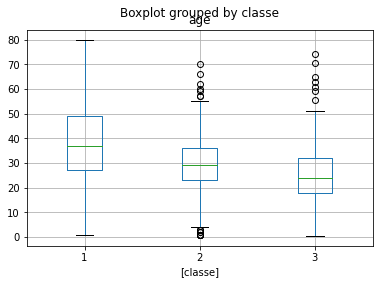

In [64]:
df.boxplot(by=['classe'], column='age')

Visiblement les passagers les plus pauvres du Titanic étaient également les plus jeunes.

<AxesSubplot:ylabel='Density'>

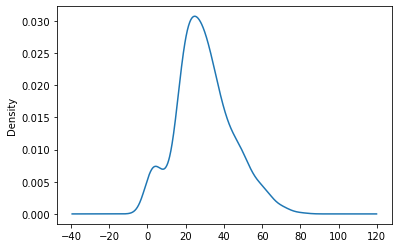

In [65]:
fig = plt.close() # fermer la figure précédente pour éviter de tracer dessus
df.age.plot.density()

<AxesSubplot:ylabel='Frequency'>

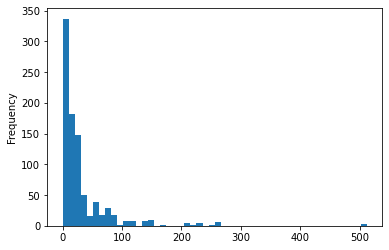

In [68]:
plt.close()
df.prix.plot.hist(bins=50)

## 4.2 Graphiques de comparaison

Affichons le diagramme de dispersion en 3D: prix/age/survie

<AxesSubplot:xlabel='age', ylabel='prix'>

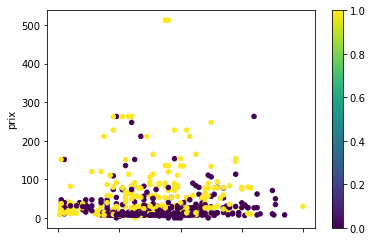

In [70]:
plt.close()
df.plot.scatter(x='age', y='prix', c=df.survie, colormap='viridis')

## Graphiques de relations

Le support est partiel dans `pandas`, seules les variables quantitatives peuvent être représentées nativement. 

<AxesSubplot:>

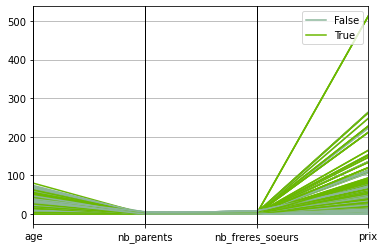

In [71]:
plt.close()
pd.plotting.parallel_coordinates(df, class_column='survie', cols=['age', 'nb_parents', 'nb_freres_soeurs', 'prix'])

Le visuel n'est pas idéal, l'échelle unique en y implique un écrasement des variables `nb_parents` et `nb_freres_soeurs`. Une solution possible serait de centrer et réduire (Z-score) toutes les variables quantitatives avant de les afficher.

## 4.4 Graphiques de flux

`pandas` n'est pas capable de générer (simplement) ces types de graphiques.